In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from keras import backend as k

In [2]:
directory = "C:\\Users\\sdey7\\Python Programs\\capture_image"

# Loading the Dataset

In [3]:
train_ds, test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(48, 48),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=True,
    data_format=None,
    verbose=True
)

Found 1000 files belonging to 10 classes.
Using 800 files for training.
Using 200 files for validation.


In [4]:
print(train_ds.class_names)
train_ds

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [5]:
train_ds_np = tfds.as_numpy(train_ds)
test_ds_np = tfds.as_numpy(test_ds)

In [6]:
X_train, y_train, X_test, y_test = np.zeros([1,48,48,1]), np.zeros([1,10]), np.zeros([1,48,48,1]), np.zeros([1,10])

for ele in train_ds_np:
    X_train = np.append(X_train, ele[0].reshape([-1,48,48,1]), axis=0)
    y_train = np.append(y_train, ele[1].reshape([-1,10]), axis=0)
    
for ele in test_ds_np:
    X_test = np.append(X_test, ele[0].reshape([-1,48,48,1]), axis=0)
    y_test = np.append(y_test, ele[1].reshape([-1,10]), axis=0)

X_train, y_train, X_test, y_test = X_train[1:,:,:,:], y_train[1:,:], X_test[1:,:,:,:], y_test[1:,:]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_train[421], y_test[100]

(800, 48, 48, 1) (800, 10) (200, 48, 48, 1) (200, 10)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

# Showing the Data:

In [7]:
import random

def generate_unique_random_integers(start, end, count):
    if start >= end or count > (end - start + 1):
        return "Invalid input"
    unique_integers = set()
    while len(unique_integers) < count:
        unique_integers.add(random.randint(start, end))
    return list(unique_integers)

10 random samples from train data:

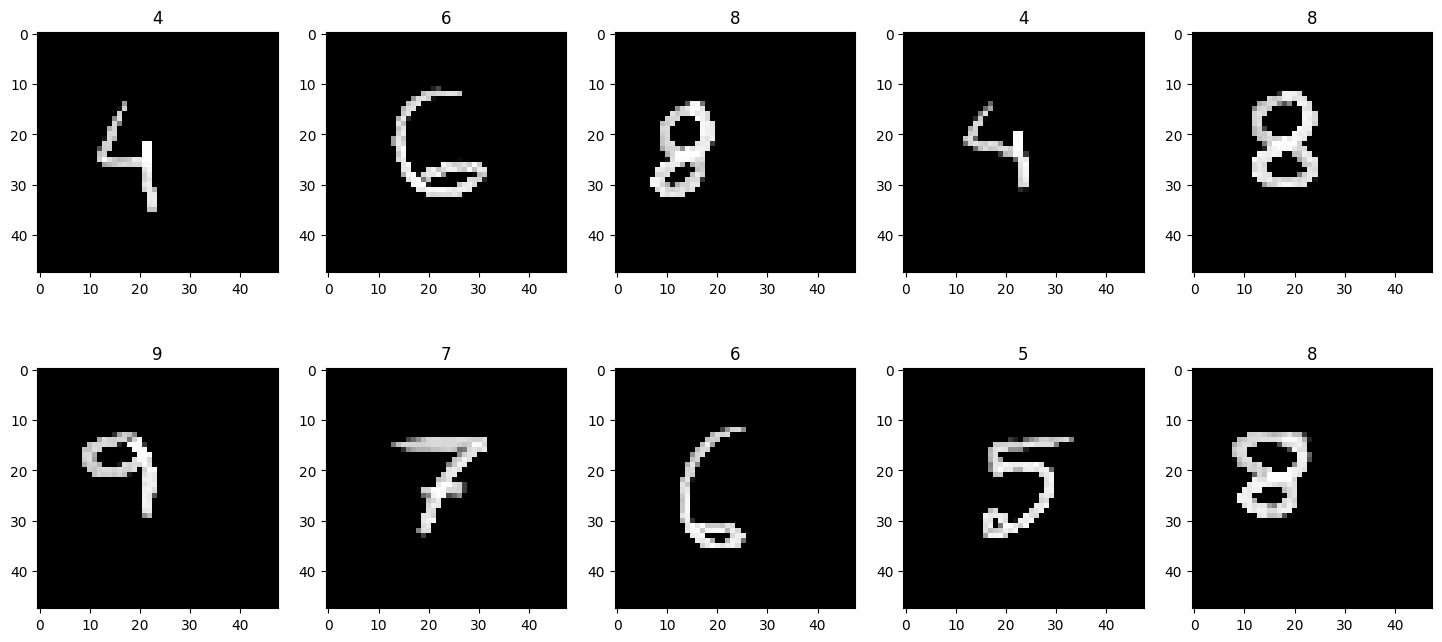

In [8]:
random_image_index = generate_unique_random_integers(0, 799, 10)
plt.figure(figsize=(18,8))
for i in range(len(random_image_index)):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[random_image_index[i]], cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])])
plt.show()

10 random samples from test data:

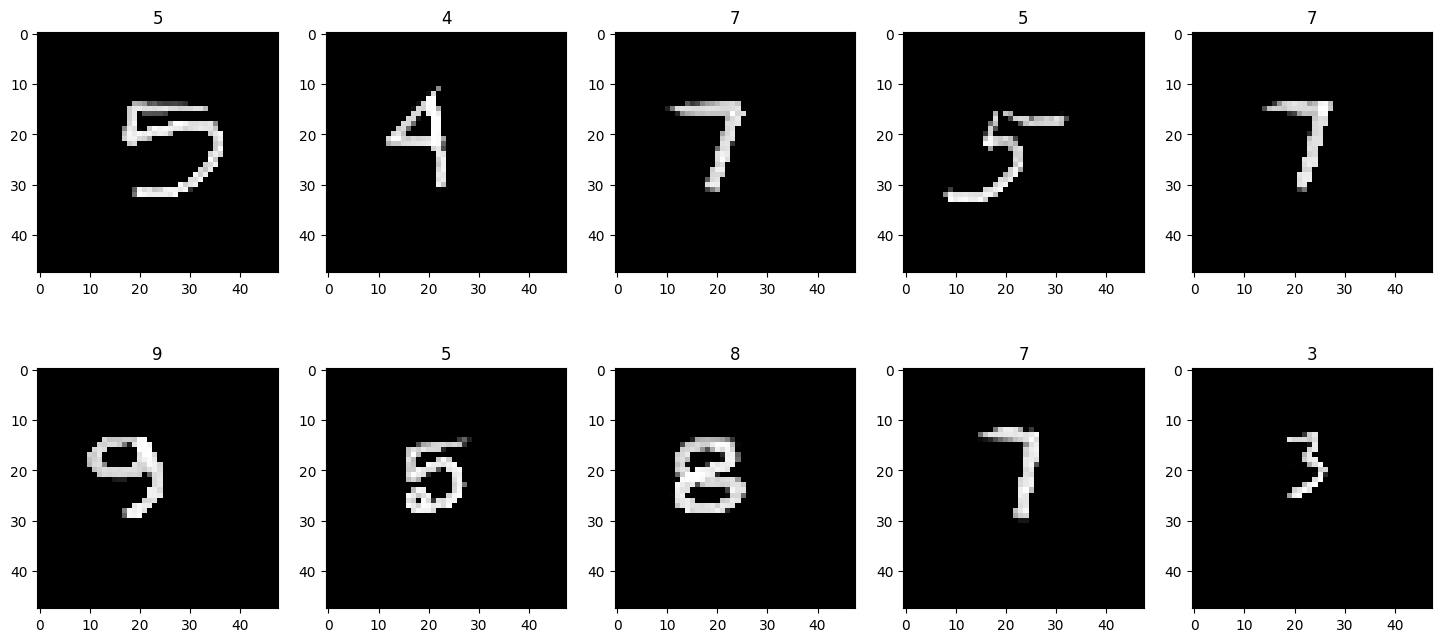

In [9]:
random_image_index = generate_unique_random_integers(0, 149, 10)
plt.figure(figsize=(18,8))
for i in range(len(random_image_index)):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[random_image_index[i]], cmap='gray')
    plt.title(test_ds.class_names[np.argmax(y_test[random_image_index[i]])])
plt.show()

# Data Preprocessing:

In [10]:
X_train_normalized = X_train.astype('float32')
X_test_normalized = X_test.astype('float32')
X_train_normalized /= 255.0
X_test_normalized /= 255.0

# Model-1: CNN

In [11]:
import keras
from tensorflow.keras import datasets, layers, models, optimizers

In [12]:
my_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

my_model.summary()

C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,602 (1.22 MB)

 Trainable params: 318,602 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
my_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    #loss_weights=None,
    metrics=['accuracy']
    #weighted_metrics=None,
    #run_eagerly=False,
    #steps_per_execution=1,
    #jit_compile='auto',
    #auto_scale_loss=True
)

In [14]:
print(X_train_normalized.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train_normalized.dtype, y_train.dtype, X_test.dtype, y_test.dtype)

(800, 48, 48, 1) (800, 10) (200, 48, 48, 1) (200, 10)
float32 float64 float64 float64


In [16]:
history = my_model.fit(
    x=X_train_normalized,
    y=y_train,
    batch_size=None,
    epochs=10,
    #verbose=2,
    #callbacks=None,
    validation_split=0.2,
    #validation_data = (X_test,y_test)
    shuffle=True,
    #class_weight=None,
    #sample_weight=None,
    #initial_epoch=0,
    #steps_per_epoch=None,
    #validation_steps=None,
    #validation_batch_size=None,
    #validation_freq=1
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9831 - loss: 0.0425 - val_accuracy: 0.9500 - val_loss: 0.1887
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9976 - loss: 0.0141 - val_accuracy: 0.9500 - val_loss: 0.1568
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9993 - loss: 0.0094 - val_accuracy: 0.9438 - val_loss: 0.2129
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9625 - val_loss: 0.1710
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9438 - val_loss: 0.1893
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9438 - val_loss: 0.1974
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 7.8319e-04 - val_accuracy: 0.9438 - val_loss: 0.2033
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 6.9821e-04 - val_accuracy: 0.

In [17]:
# Evaluate the model
test_loss, test_acc = my_model.evaluate(X_test_normalized, y_test)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9503 - loss: 0.2890
Test accuracy: 0.9399999976158142


Printing some predictions:

In [18]:
y_pred = my_model.predict(X_test_normalized)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


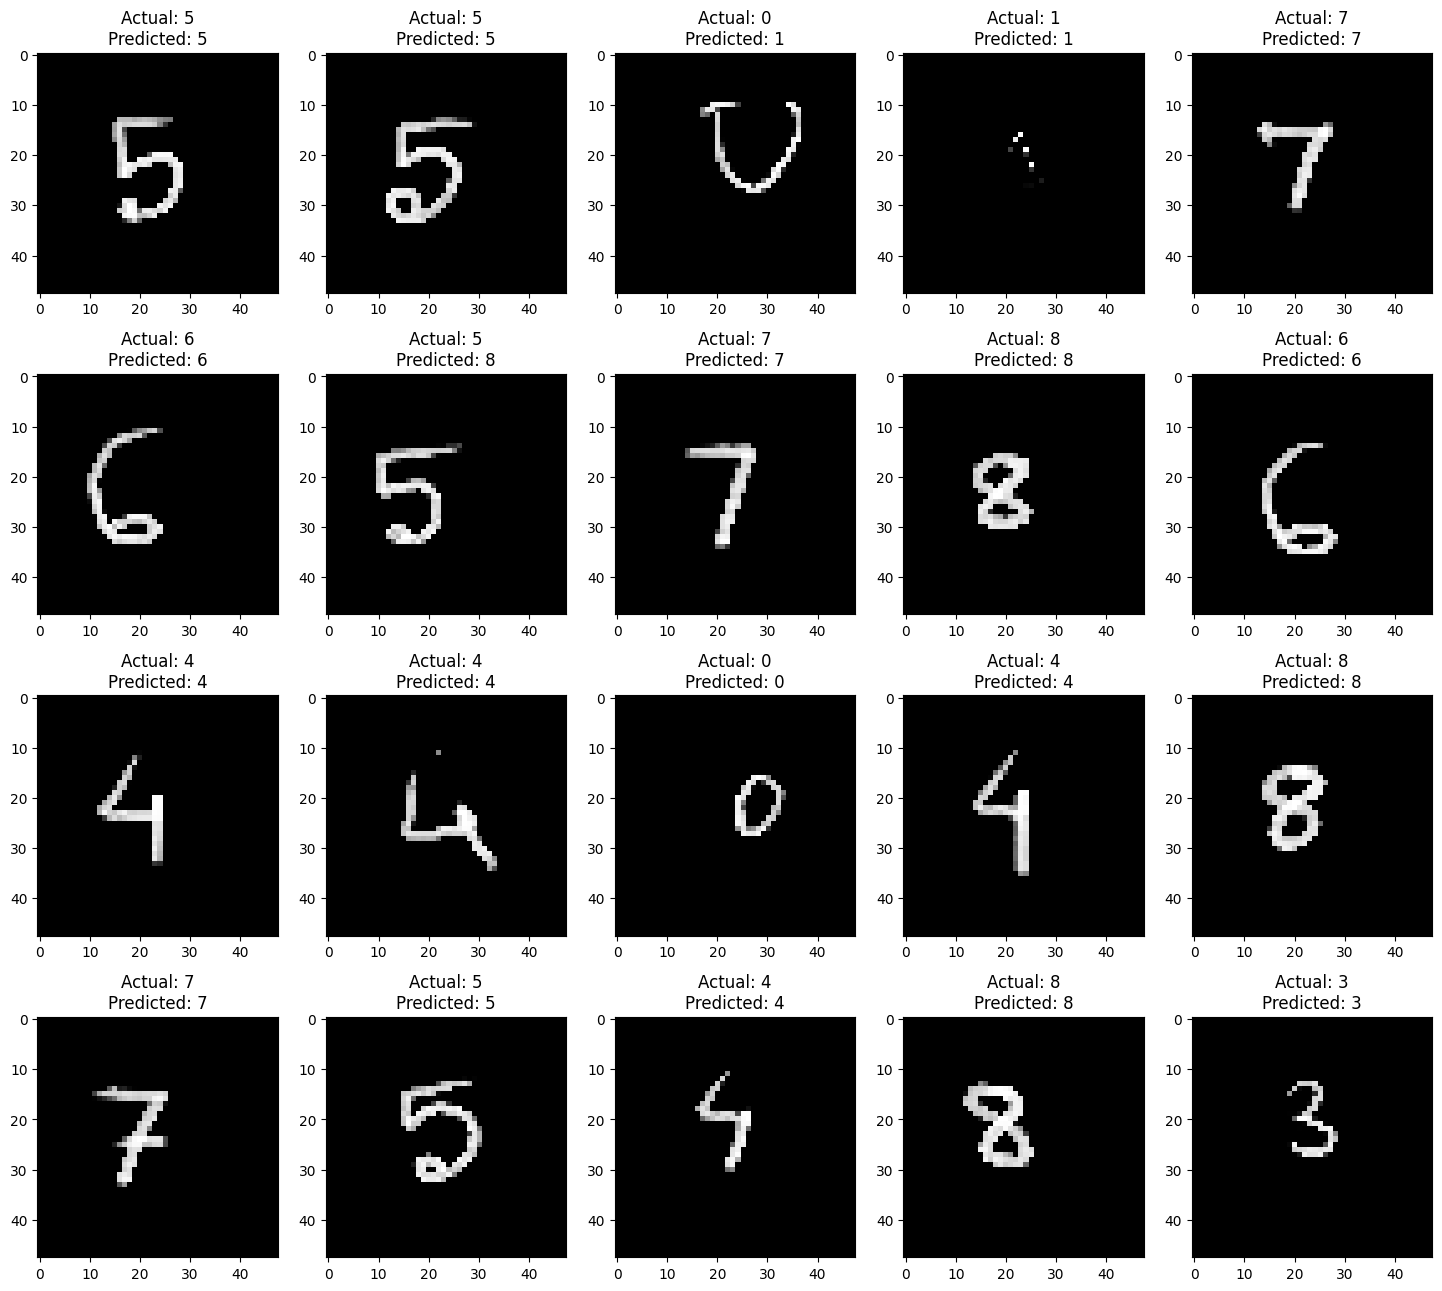

In [19]:
random_image_index = generate_unique_random_integers(0, 149, 20)
plt.figure(figsize=(18,16))
for i in range(len(random_image_index)):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test[random_image_index[i]], cmap='gray')
    plt.title("Actual: "+test_ds.class_names[np.argmax(y_test[random_image_index[i]])]+"\nPredicted: "+test_ds.class_names[np.argmax(y_pred[random_image_index[i]])])
plt.show()

# Pixel Vector Calculation:

In [20]:
def LRV(M):  #Local Resultant Vector
    sh = M.shape
    X,Y,I = 0,0,0
    for i in range(0,sh[0]):
        for j in range(0,sh[1]):
            X += M[i,j]*j
            Y += M[i,j]*i
            I += M[i,j]
    I += 1e-9
    return X/I+1e-9,Y/I+1e-9

In [21]:
def PVBID(image): #Pixel Vector Based Image Descriptor
    img = np.pad(
        image,
        [[1,1],[1,1]],
        mode='symmetric'
    )
    
    sh = img.shape
    m,n = 3,3
    img1 = np.zeros([sh[0]-m+1,sh[1]-n+1,2])
    #img2 = np.zeros([sh[0]-m+1,sh[1]-n+1])
    for i in range(sh[0]-m+1):
        for j in range(sh[1]-n+1):
            xlfm, ylfm = LRV(img[i:i+m,j:j+n])
            img1[i,j,0] = img[i,j]
            img1[i,j,1] = np.sqrt((xlfm-1)**2 + (ylfm-1)**2)
    for i in range(2):
        img1[:,:,i] = cv2.normalize(src=img1[:,:,i], dst=None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
        
    return img1

# Transforming the Dataset:

In [22]:
X_train_shape, X_test_shape = list(X_train.shape), list(X_test.shape)
X_train_shape[-1], X_test_shape[-1] = 2,2
X_train_transformed, X_test_transformed = np.empty(X_train_shape), np.empty(X_test_shape)

for i in range(X_train_shape[0]):
    X_train_transformed[i] = PVBID(X_train[i].reshape([48,48]))

for i in range(X_test_shape[0]):
    X_test_transformed[i] = PVBID(X_test[i].reshape([48,48]))

#X_train, y_train, X_test, y_test = X_train[1:,:,:,:], y_train[1:,:], X_test[1:,:,:,:], y_test[1:,:]
print(X_train_transformed.shape, y_train.shape, X_test_transformed.shape, y_test.shape)
y_train[421], y_test[100]

(800, 48, 48, 2) (800, 10) (200, 48, 48, 2) (200, 10)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

# Showing the Transformed Data:

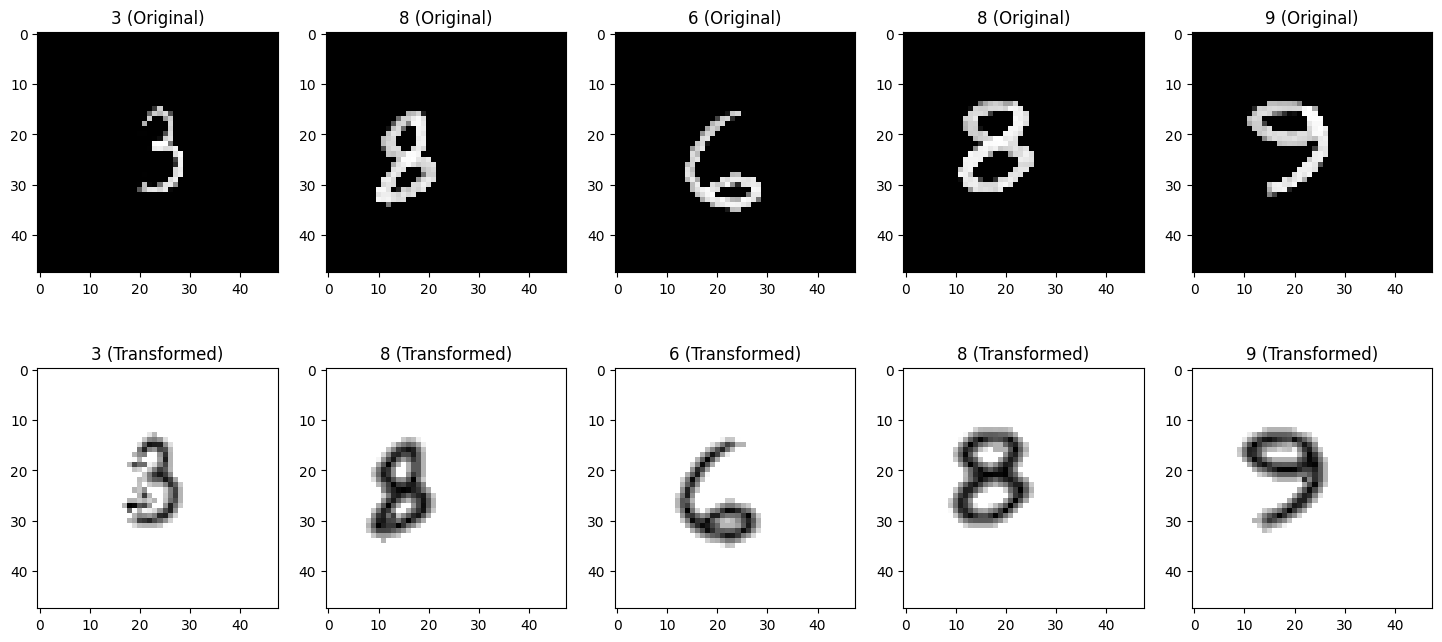

In [23]:
random_image_index = generate_unique_random_integers(0, 799, 5)
plt.figure(figsize=(18,8))
for i in range(len(random_image_index)):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train_transformed[random_image_index[i],:,:,0], cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])]+" (Original)")
    
    plt.subplot(2,5,i+6)
    plt.imshow(X_train_transformed[random_image_index[i],:,:,1], cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])]+" (Transformed)")
plt.show()

# Edge Detection:

In [24]:
def Global_Edge(img):
    global_mean = np.mean(img)
    binary_img = np.ones(img.shape)
    m,n = img.shape
    
    for i in range(m):
        for j in range(n):
            if(img[i,j]>global_mean):
                binary_img[i,j] = 0
                
    return binary_img

In [25]:
def Local_Edge(img, n):
    w = 2*n+1
    padded_img = np.pad(img, ((n,n),(n,n)), mode='reflect')
    comperator_img = np.zeros(img.shape)
    binary_img = np.ones(img.shape)
    m,n = img.shape
    
    for i in range(m):
        for j in range(n):
            comperator_img[i,j] = np.mean(padded_img[i:i+w,j:j+w])
            
    for i in range(m):
        for j in range(n):
            if(img[i,j]>comperator_img[i,j]):
                binary_img[i,j] = 0
                
    return binary_img

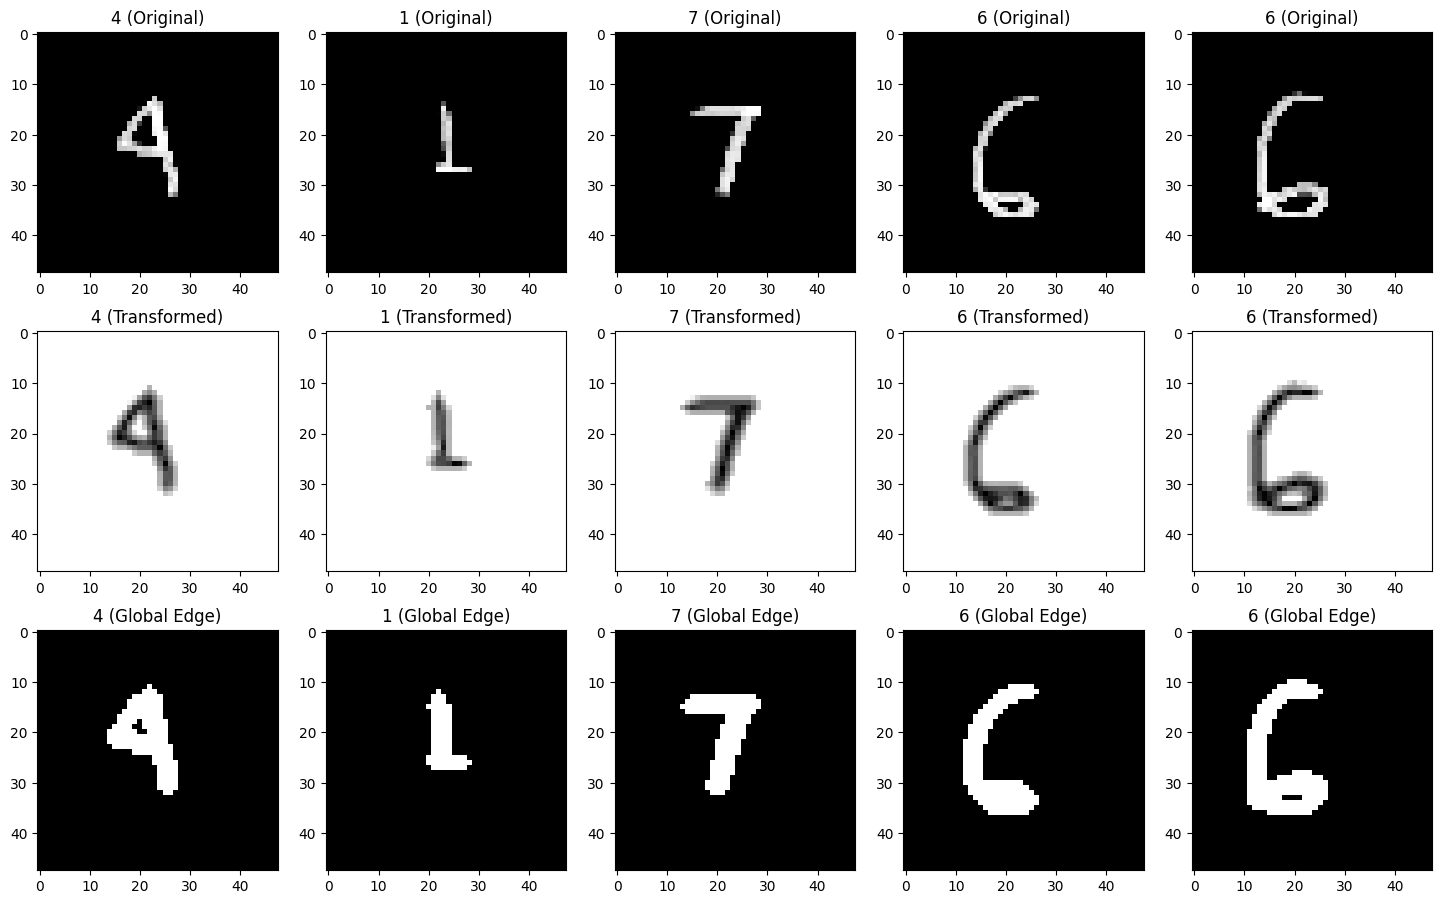

In [26]:
random_image_index = generate_unique_random_integers(0, 799, 5)
plt.figure(figsize=(18,11))
for i in range(len(random_image_index)):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train_transformed[random_image_index[i],:,:,0], cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])]+" (Original)")
    
    plt.subplot(3,5,i+6)
    plt.imshow(X_train_transformed[random_image_index[i],:,:,1], cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])]+" (Transformed)")
    
    plt.subplot(3,5,i+11)
    plt.imshow(Global_Edge(X_train_transformed[random_image_index[i],:,:,1]), cmap='gray')
    plt.title(train_ds.class_names[np.argmax(y_train[random_image_index[i]])]+" (Global Edge)")
plt.show()

Data Pre-processing:

In [27]:
X_train_normalized = X_train_transformed.astype('float32')
X_test_normalized = X_test_transformed.astype('float32')
X_train_normalized /= 255.0
X_test_normalized /= 255.0

# Model-2: PVBID Transformation + CNN

In [28]:
my_model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 2)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

my_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 32)          │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,890 (1.22 MB)

 Trainable params: 318,890 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
my_model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    #loss_weights=None,
    metrics=['accuracy']
    #weighted_metrics=None,
    #run_eagerly=False,
    #steps_per_execution=1,
    #jit_compile='auto',
    #auto_scale_loss=True
)

In [30]:
print(X_train_normalized.shape, y_train.shape, X_test_normalized.shape, y_test.shape)
print(X_train_normalized.dtype, y_train.dtype, X_test_normalized.dtype, y_test.dtype)

(800, 48, 48, 2) (800, 10) (200, 48, 48, 2) (200, 10)
float32 float64 float32 float64


In [32]:
history_1 = my_model_2.fit(
    x=X_train_normalized,
    y=y_train,
    batch_size=None,
    epochs=10,
    #verbose=2,
    #callbacks=None,
    validation_split=0.2,
    #validation_data = (X_test,y_test)
    shuffle=True,
    #class_weight=None,
    #sample_weight=None,
    #initial_epoch=0,
    #steps_per_epoch=None,
    #validation_steps=None,
    #validation_batch_size=None,
    #validation_freq=1
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9815 - loss: 0.0804 - val_accuracy: 0.9563 - val_loss: 0.1366
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9918 - loss: 0.0393 - val_accuracy: 0.9563 - val_loss: 0.1769
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9868 - loss: 0.0391 - val_accuracy: 0.9500 - val_loss: 0.1431
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9925 - loss: 0.0240 - val_accuracy: 0.9563 - val_loss: 0.1418
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0112 - val_accuracy: 0.9500 - val_loss: 0.1579
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 0.9500 - val_loss: 0.1334
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9563 - val_loss: 0.1306
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.9500 - v

In [33]:
# Evaluate the model
test_loss, test_acc = my_model_2.evaluate(X_test_normalized, y_test)
print('Test accuracy:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9264 - loss: 0.1921
Test accuracy: 0.9200000166893005


In [34]:
y_pred = my_model_2.predict(X_test_normalized)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


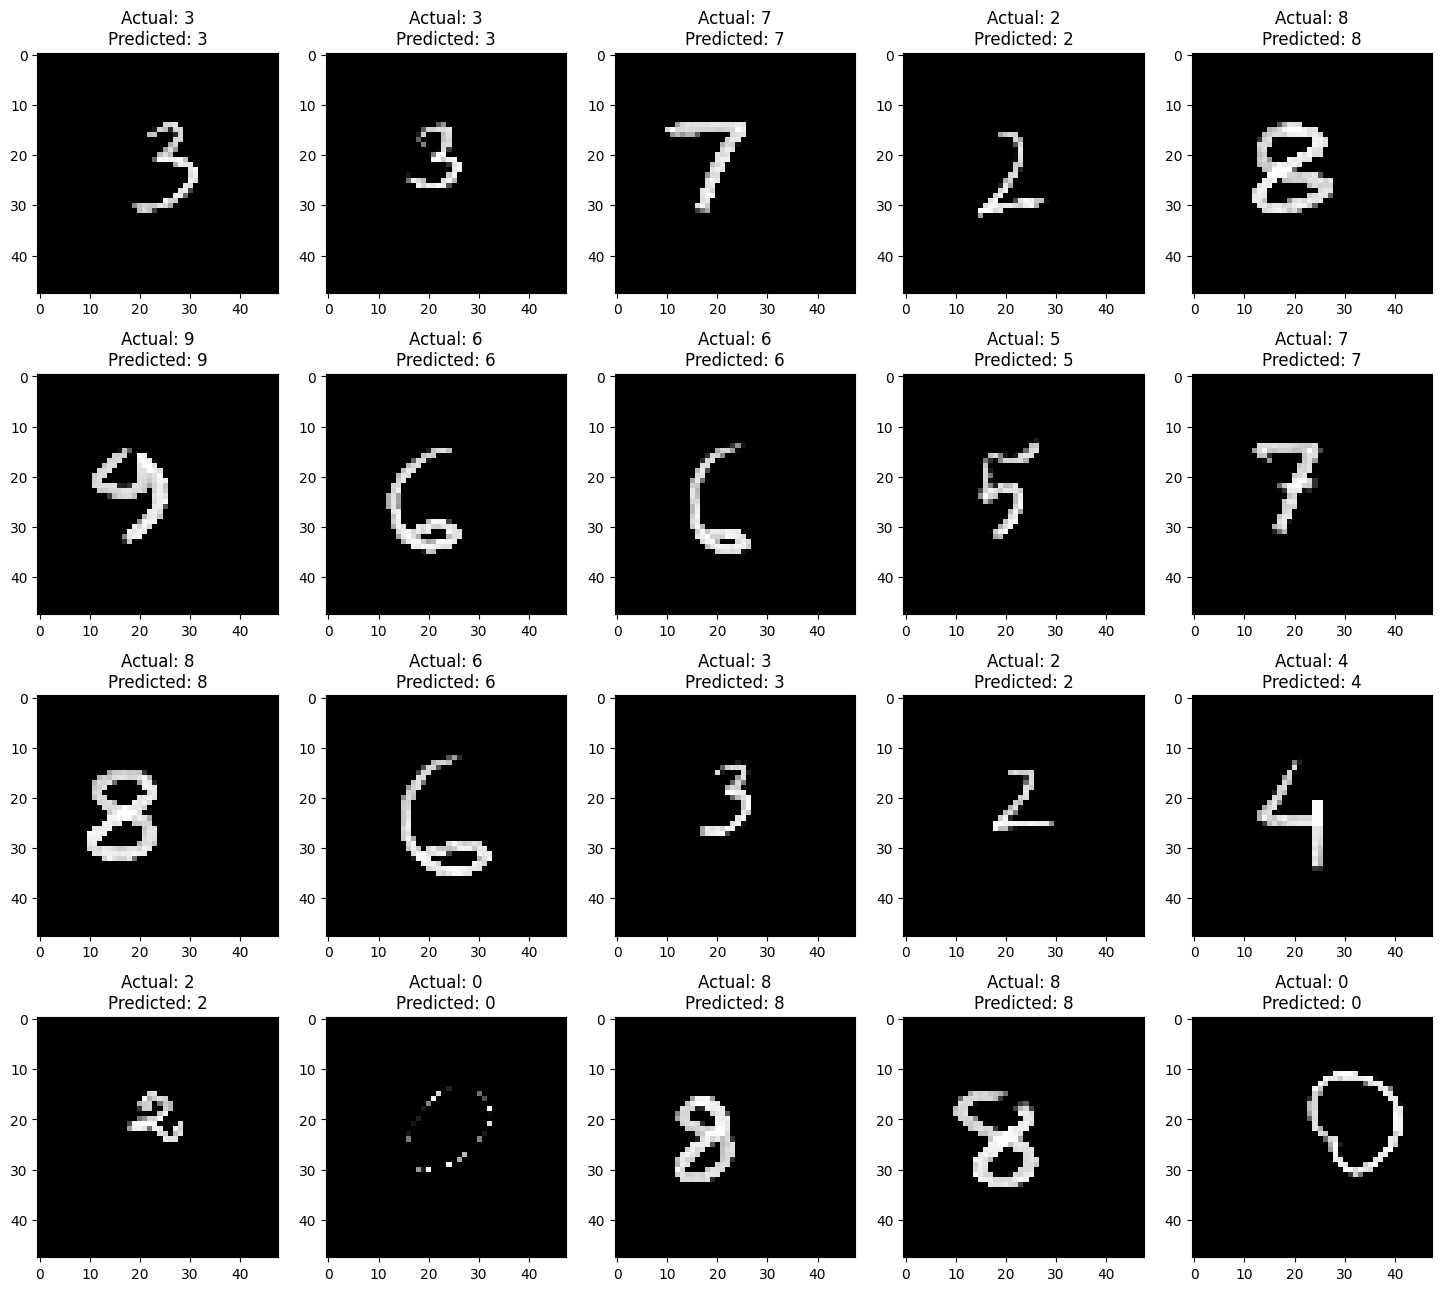

In [35]:
random_image_index = generate_unique_random_integers(0, 199, 20)
plt.figure(figsize=(18,16))
for i in range(len(random_image_index)):
    plt.subplot(4,5,i+1)
    plt.imshow(X_test_transformed[random_image_index[i],:,:,0], cmap='gray')
    plt.title("Actual: "+test_ds.class_names[np.argmax(y_test[random_image_index[i]])]+"\nPredicted: "+test_ds.class_names[np.argmax(y_pred[random_image_index[i]])])
plt.show()

Length of contours 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


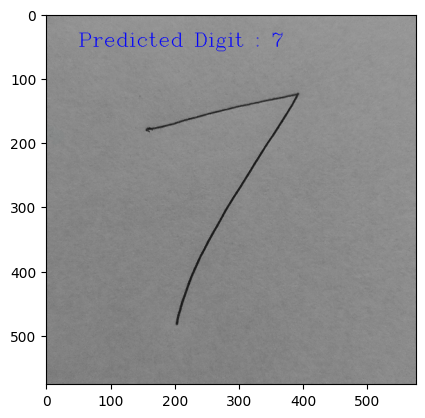

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

size=576
img = cv2.imread("C:\\Users\\sdey7\\Python Programs\\digit7.jpg",1)
img = cv2.resize(img,(size,size),interpolation=cv2.INTER_CUBIC)

im_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#plt.imshow(im_gray,cmap='gray')

gaussian = cv2.GaussianBlur(im_gray, (5,5), 2)
sharp = cv2.addWeighted(im_gray,3.5, gaussian, -2.5, 0)
#plt.imshow(sharp,cmap='gray')

ret1, th1 = cv2.threshold(sharp, 25, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(sharp, 25, 255, cv2.THRESH_BINARY_INV)
th3 = th2.copy()
#plt.imshow(th2,cmap='gray')

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))
dil_img = cv2.dilate(th2, kernel)
#plt.imshow(dil_img,cmap='gray')

contours, hierarchy = cv2.findContours(dil_img, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
print("Length of contours {}".format(len(contours)))
# print(contours)
im_copy = img.copy()
im_copy = cv2.drawContours(im_copy, contours, -1, (0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
#plt.imshow(im_copy,cmap='gray')

while(size>48):
    size=size-48
    dil_img = cv2.resize(dil_img,(size,size),interpolation=cv2.INTER_LINEAR)
    #img_resized = cv2.bitwise_not(img_resized)
#plt.imshow(dil_img,cmap='gray')

im_final = dil_img.reshape(-1,48,48,1)
ans = my_model.predict(im_final)
ans = np.argmax(ans,axis=1)[0]
#print(ans)
cv2.putText(img,'Predicted Digit : '+str(ans),(50,50),cv2.FONT_HERSHEY_COMPLEX, 1,(0,0,255),1)

plt.imshow(img,cmap='gray')

cv2.waitKey(0)
cv2.destroyAllWindows()